<a href="https://colab.research.google.com/github/marquesgabi/Portifolio/blob/main/ANN_Image_Processig/Recycle_008_Image_Processing_SVM_with_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='trash.zip'
Img_Size = 50
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 0),(Img_Size,Img_Size)))

In [5]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

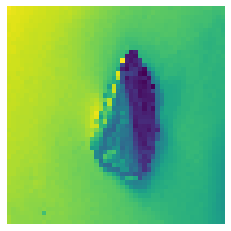

In [7]:
img=plt.imread(img_name[600])
plt.axis("off")
plt.imshow(x_gray[600])

In [8]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [9]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel())

X = pd.DataFrame(x_data)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3)

In [11]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [12]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [13]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [14]:
df = pd.DataFrame({'true':y_train,'calc':y_calc_train})
print(pd.crosstab(df['true'],df['calc'])) 

calc   0   1   2   3   4   5
true                        
0     80   1   2   0   4   0
1      1  71   2   0   4   1
2      0   7  86   0   3   1
3      0   1   1  71  11   1
4      1   1   5   1  77   1
5      1   1   2   0   5  95


In [15]:
df = pd.DataFrame({'true':y_test,'calc':y_calc_test})
print(pd.crosstab(df['true'],df['calc'])) 

calc   0  1  2   3   4  5
true                     
0     19  0  2   0   2  2
1      3  5  9   2   5  1
2      2  3  9   2   5  3
3      3  0  2  10   4  0
4      5  1  2   1  16  1
5      1  3  2   0   1  9


In [16]:
unique_list

['car', 'gla', 'met', 'pap', 'pla', 'tra']

In [17]:
y_true = y_test
y_pred = y_calc_test
target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   cardboard       0.58      0.76      0.66        25
       glass       0.42      0.20      0.27        25
       metal       0.35      0.38      0.36        24
       paper       0.67      0.53      0.59        19
     plastic       0.48      0.62      0.54        26
       trash       0.56      0.56      0.56        16

    accuracy                           0.50       135
   macro avg       0.51      0.51      0.50       135
weighted avg       0.50      0.50      0.49       135

